In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from joblib import dump, load
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [396]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [397]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Univ AI hackathon/Training Data.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Univ AI hackathon/Test Data.csv')
test_data_bck=test_data
print(train_data.head(2))
print(test_data.head(2))

   Id   income  age  ...  current_job_years current_house_years risk_flag
0   1  1303835   23  ...                  3                  13         0
1   2  7574516   40  ...                  9                  13         0

[2 rows x 13 columns]
   id   income  age  ...        state current_job_years current_house_years
0   1  7393090   59  ...  West Bengal                 4                  13
1   2  1215004   25  ...  Maharashtra                 5                  10

[2 rows x 12 columns]


In [398]:
X=train_data.drop(columns=['Id','risk_flag'])
y=train_data['risk_flag']
test_data=test_data.drop(columns='id')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=32)

In [399]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.20,random_state=22)

In [400]:
numeric_features = ['income','experience','age','current_job_years','current_house_years']
numeric_transformer = StandardScaler()

categorical_features = ['married','house_ownership','car_ownership','profession','city','state']
categorical_transformer = OneHotEncoder()

ct = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [401]:
encoded_X_train=ct.fit_transform(X_train).toarray()
encoded_X_val=ct.fit_transform(X_val).toarray()
encoded_X_test=ct.fit_transform(test_data).toarray()
X_test=ct.fit_transform(X_test).toarray()

In [402]:
type(encoded_X_train)

numpy.ndarray

**NN**

In [403]:
import tensorflow as tf
from tensorflow import keras

In [404]:
# model=keras.models.Sequential()
# model.add(keras.layers.Dense(500,activation="relu",input_dim=409))
# model.add(keras.layers.Dense(300,activation='relu'))
# model.add(keras.layers.Dense(400,activation='relu'))
# model.add(keras.layers.Dense(1,activation='sigmoid'))

In [405]:
# model.summary()

In [406]:
# model.compile(optimizer='adamax',loss='binary_crossentropy',metrics=[tf.keras.metrics.AUC()])

In [407]:
# checkpoint_pt = keras.callbacks.ModelCheckpoint("NN_univ.h5",save_best_only=True)

In [408]:
# model.fit(encoded_X_train,y_train,batch_size=15,epochs=20,validation_data=(encoded_X_val,y_val),workers=-1,callbacks=[checkpoint_pt])

In [409]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/NN_univ.h5")

In [410]:
predictions=model.predict(encoded_X_val)
predictions=predictions>0.5
prediction_nn=np.where(predictions==False,0,1)
nn_pred_df=pd.DataFrame(prediction_nn,columns=['prediction'])

In [411]:
def scoring(y_test,predictions):
  print(f'roc auc score \n{roc_auc_score(y_test,predictions)}')
  print(f'confusion_matrix \n{confusion_matrix(y_test,predictions)}')
  print(f'value counts \n{pd.DataFrame(predictions).value_counts()}')
  fpr, tpr, thresholds=roc_curve(y_test,predictions)
  print(f"fpr = {fpr} , tpr = {tpr}")
  plt.figure(figsize=(7,7))
  plt.plot([0, 1], [0, 1], 'k--',label='Thresold')
  plt.plot(fpr, tpr, linewidth=2,color='green',label='RF')
  plt.ylabel('True positive rate(Recall)')
  plt.xlabel('False positive rate')
  plt.title('ROC')
  plt.legend()
  plt.show()

roc auc score 
0.7488112117780295
confusion_matrix 
[[33357  1963]
 [ 2234  2766]]
value counts 
0    35591
1     4729
dtype: int64
fpr = [0.         0.05557758 1.        ] , tpr = [0.     0.5532 1.    ]


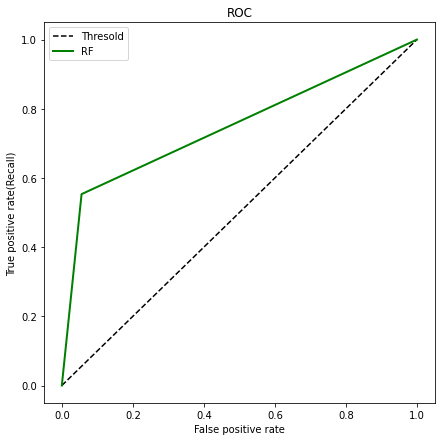

In [412]:
# Scoring data for neural network
scoring(y_val,prediction_nn)

**Random forest**

In [413]:
# rf_model=RandomForestClassifier()
# rf_model.fit(encoded_X_train,y_train)
rf_model=load('/content/drive/MyDrive/Colab Notebooks/rf.joblib')

roc auc score 
0.7420520951302378
confusion_matrix 
[[33593  1727]
 [ 2335  2665]]
value counts 
0    35928
1     4392
dtype: int64
fpr = [0.         0.04889581 1.        ] , tpr = [0.    0.533 1.   ]


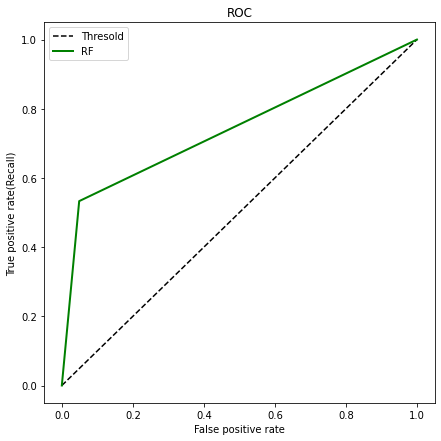

In [414]:
prediction_rf=rf_model.predict(encoded_X_val)
scoring(y_val,prediction_rf)

**Decsion tree**

In [415]:
# dt_model=DecisionTreeClassifier()
# dt_model.fit(encoded_X_train,y_train)
dt_model=load('/content/drive/MyDrive/Colab Notebooks/dt.joblib')

In [416]:
# prediction_dt=dt_model.predict(encoded_X_val)
# scoring(y_val,prediction_dt)

**Xgboost**

roc auc score 
0.7615295583238958
confusion_matrix 
[[28138  7182]
 [ 1368  3632]]
value counts 
0    29506
1    10814
dtype: int64
fpr = [0.         0.20334088 1.        ] , tpr = [0.     0.7264 1.    ]


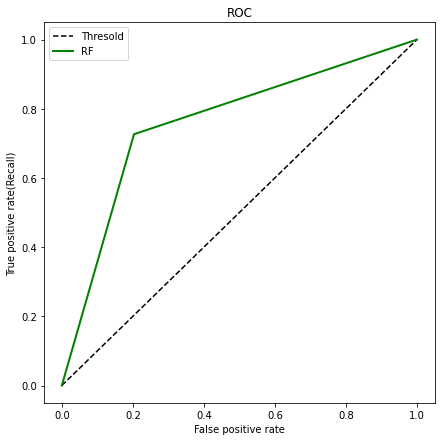

In [417]:
clf_xg=xgb.XGBClassifier(objective='binary:logistic',seed=60,max_depth=9,learning_rate=0.1,gamma=0.25,reg_lambda=10,scale_pos_weight=7)
# clf_xg.fit(encoded_X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='auc',eval_set=[(encoded_X_val,y_val)])
clf_xg=load('/content/drive/MyDrive/Colab Notebooks/xg.joblib')
predictions_xg=clf_xg.predict(encoded_X_val)
scoring(y_val,predictions_xg)

**Dumping model**

In [418]:
# dump(rf_model,'rf.joblib')
# dump(dt_model,'dt.joblib')
# dump(clf_xg,'xg.joblib')

In [419]:
# files.download("rf.joblib")
# files.download("dt.joblib")
# files.download('xg.joblib')


**Blending models**

In [420]:
predictions_xg.shape

(40320,)

In [421]:
data={
    'pred_nn':nn_pred_df['prediction'],
    'pred_rf':prediction_rf,
    'pred_xg':predictions_xg
}
df_blend=pd.DataFrame(data=data)
df_blend['target']=list(y_val)
df_blend

,pred_nn,pred_rf,pred_xg,target
0,0,0,1,0
1,0,0,0,0
2,0,0,1,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
40315,0,0,0,0
40316,0,0,0,0
40317,0,0,0,0
40318,1,1,1,1


In [422]:
blend_X=df_blend.drop(columns=['target'])
blend_y=df_blend['target']
blend_model=LogisticRegression(C=3,class_weight={0:1,1:8})
blend_model.fit(blend_X,blend_y)

LogisticRegression(C=3, class_weight={0: 1, 1: 8}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

roc auc score 
0.7865790159843429
confusion_matrix 
[[34947  9285]
 [ 1338  4830]]
value counts 
0    36285
1    14115
dtype: int64
fpr = [0.        0.2099159 1.       ] , tpr = [0.         0.78307393 1.        ]


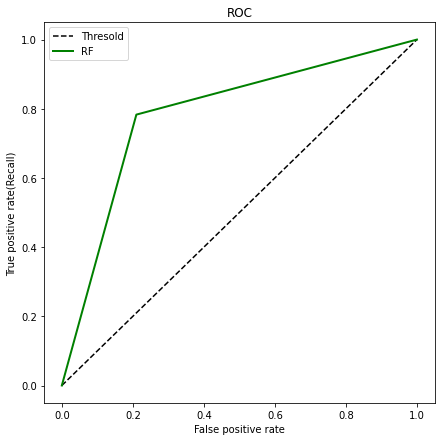

In [423]:
#The base model training
#NN
predictions=model.predict(X_test)
predictions=predictions>0.5
blend_nn_pred=np.where(predictions==False,0,1)

#RF
blend_rf_pred=rf_model.predict(X_test)

#XG
blend_xg_pred=clf_xg.predict(X_test)


#Blended_pred
data={
    'pred_nn':list(blend_nn_pred),
    'pred_rf':blend_rf_pred,
    'pred_xg':blend_xg_pred
}
X=pd.DataFrame(data=data)
blend_predictions=blend_model.predict(X)
scoring(y_test,blend_predictions)

**voting clf**

In [424]:
###########Xg boost not included
# itr=y_test.shape[0]
# voting_pred=[]
# for i in range(itr):
#   if (nn_pred_df['prediction'][i]==1 and prediction_rf[i]==1) or (nn_pred_df['prediction'][i]==1 and prediction_dt[i]==1) :
#     voting_pred.append(1)
#   else:
#     voting_pred.append(0)

In [425]:
# scoring(y_test,voting_pred)

**weighted average**

In [426]:
# itr=X_test.shape[0]
# weighted_pred=[]
# for i in range(itr):
#   weighted_avg=(2*predictions_xg[i]+(3*nn_pred_df['prediction'][i])+(3*prediction_rf[i])+prediction_dt[i])/9
#   if weighted_avg>=0.4:
#     weighted_pred.append(1)
#   else:
#     weighted_pred.append(0)


In [427]:
# scoring(y_test,weighted_pred)

**Final predictions**

In [428]:
###########################################################
##USing Weighted Avg

#NN
predictions=model.predict(encoded_X_test)
predictions=predictions>0.5
prediction_nn=np.where(predictions==False,0,1)
nn_pred_df=pd.DataFrame(prediction_nn,columns=['prediction'])

# RF
prediction_rf=rf_model.predict(encoded_X_test)

#DT
prediction_dt=dt_model.predict(encoded_X_test)

#xg boost
prediction_xg=clf_xg.predict(encoded_X_test)

## voting clf without xg

# itr=encoded_X_test.shape[0]
# voting_pred=[]
# for i in range(itr):
#   if (nn_pred_df['prediction'][i]==1 and prediction_rf[i]==1) or (nn_pred_df['prediction'][i]==1 and prediction_dt[i]==1) :
#     voting_pred.append(1)
#   else:
#     voting_pred.append(0)


# Weighted Average

# itr=encoded_X_test.shape[0]
# weighted_pred=[]
# for i in range(itr):
#   weighted_avg=(2*predictions_xg[i]+(3*nn_pred_df['prediction'][i])+(3*prediction_rf[i])+prediction_dt[i])/9
#   if weighted_avg>=0.4:
#     weighted_pred.append(1)
#   else:
#     weighted_pred.append(0)


############################################################################
##USing Stacked model

#The base model training
#NN
predictions=model.predict(encoded_X_test)
predictions=predictions>0.5
blend_nn_pred=np.where(predictions==False,0,1)

#RF
blend_rf_pred=rf_model.predict(encoded_X_test)

#XG
blend_xg_pred=clf_xg.predict(encoded_X_test)


#Blended_pred
data={
    'pred_nn':list(blend_nn_pred),
    'pred_rf':blend_rf_pred,
    'pred_xg':blend_xg_pred
}
X=pd.DataFrame(data=data)
blend_predictions=blend_model.predict(X)

In [429]:
final_data={'id':test_data_bck['id'],'risk_flag':blend_predictions}
df_final=pd.DataFrame(final_data)

In [430]:
df_final['risk_flag'].value_counts()

0    20112
1     7888
Name: risk_flag, dtype: int64

In [431]:
df_final.to_csv('final_submission.csv',index=False)
files.download("final_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>